We have a particle in 1-D space with a force acting on it:

$$ F(x) = -kx $$

This is the force equation for a linear harmonic oscillator.

Let's find the equation of motion for the particle, taking into account special relativity. The Lagrangian for a particle in a 1+1 Minkowski spacetime within a potential energy V(x) is the following. I won't prove it here, it's a basically standard equation (TODO: Add a source for it at least).

$$ L = -m\sqrt{1-\dot{x}^2} - V(x) $$

We know from the definition of potential energy that:

$$ \frac{\partial V(x)}{\partial x} = -F(x) = kx $$

We can choose any function $V(x)$ that has that derivative. So let's integrate:

$$ V(x) = \int \frac{\partial V(x)}{\partial x} dx = \int kx dx = \frac{1}{2}kx^2 + c_0 $$

We can set $c_0$ to anything, so let's choose $c_0 = 0$.

$$ V(x) = \frac{1}{2}kx^2 $$

Now we have the Lagrangian:

$$ L = -m\sqrt{1-\dot{x}^2} - \frac{1}{2}kx^2 $$

To get an equation of motion from this, we have to find the Euler-Lagrange equation, which is generally:

$$ \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial x} $$

The right side is pretty simple:

$$ \frac{\partial L}{\partial x} = \frac{\partial}{\partial x} (-m\sqrt{1-\dot{x}^2} - \frac{1}{2}kx^2) = -kx$$

The left side is more difficult, so I used WolframAlpha for it, not going to lie.

$$ \frac{\partial L}{\partial \dot{x}} = \frac{\partial}{\partial \dot{x}}(-m\sqrt{1-\dot{x}^2} - \frac{1}{2}kx^2) = \frac{m\dot{x}}{\sqrt{1-\dot{x}^2}} $$

$$ \frac{d}{dt}\frac{\partial L}{\partial \dot{x}} = \frac{d}{dt}(\frac{m\dot{x}}{\sqrt{1-\dot{x}^2}}) = \frac{m \ddot{x}}{(1 - \dot{x}^2)^{3/2}}$$

Putting this together, we get the equation of motion:

$$ \frac{m \ddot{x}}{(1 - \dot{x}^2)^{3/2}} = -kx $$

This will be easier to use if we put $\ddot{x}$ by itself on one side:

$$ \ddot{x} = -\frac{k}{m}x(1 - \dot{x}^2)^{3/2} $$

So this is the equation of motion that the oscillating particle must follow.

This is very similar to the equation of motion for a non-relativistic linear harmonic oscillator, which is $\ddot{x} = -\frac{k}{m}x$. But here, we have this extra $(1-\dot{x}^2)^{2/3}$ factor.

In fact, the nonrelativistic limit can be found if we use slow speeds, $\dot{x}^2 << 1$, which gives $(1-\dot{x}^2)^{3/2} \approx 1 $, and then $\ddot{x} \approx -\frac{k}{m}x$, agreeing with what we already know from non-relativistic physics.

We can numerically integrate this equation of motion quite easily. All we have to do is pick the initial conditions of a particle by setting its position and velocity at time $t=0$. Then we can iteratively step the system forward in time by small amounts of time. On each step, we have to calculate the current acceleration that the particle experiences, then we have to adjust the current velocity and position of the particle according to the current acceleration and velocity of the particle.

The first step is to create a function to calculate the acceleration of the particle, given its velocity and position.

In [1]:
def acceleration(x, x_dot, k=1, m=1):
    return -(k/m) * x * (1 - x_dot**2)**(3/2)

Next, we'll create a function that takes in the values of position and velocity at some time $t$ and gives an updated position and velocity at time $t + \Delta t$.

We can use a very simplistic method called Euler integration, which is:

$$ x(t+\Delta t) = x(t) + \Delta t \dot{x}(t) $$

$$ \dot{x}(t+\Delta t) = \dot{x}(t) + \Delta t \ddot{x}(t) $$

In [2]:
def step(delta_t, x, x_dot, k=1, m=1):
    x_ = x + delta_t * x_dot
    
    x_ddot = acceleration(x, x_dot, k, m)
    
    x_dot_ = x_dot + delta_t * x_ddot
    
    return x_, x_dot_

Now let's try setting the initial state $x(0) = 0$, $\dot{x}(0) = 0.99$ and just see what happens when we iterate through the system with a timestep of $\Delta t = 0.001$ for 100,000 steps.

Text(0, 0.5, 't, time')

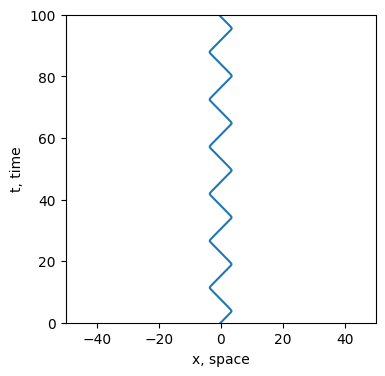

In [91]:
def calc_worldline(x0, x_dot0):
    x = x0
    x_dot = x_dot0
    
    t = 0
    delta_t = 0.001

    positions = [x]
    times = [t]

    for step_num in range(100_000):
        x, x_dot = step(delta_t, x, x_dot)
        t = (step_num + 1) * delta_t
        positions.append(x)
        times.append(t)
    
    return positions, times
    
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (4, 4)
plt.plot(*calc_worldline(0, 0.99))
plt.xlim([-50, 50])
plt.ylim([0, 100])
plt.xlabel('x, space')
plt.ylabel('t, time')

So when the oscillating particle's maximum speed is close to the speed of light, its worldline looks like a sawtooth function with rounded edges. Let's look at what happens with a lower maximum speed, say $0.1$.

Text(0, 0.5, 't, time')

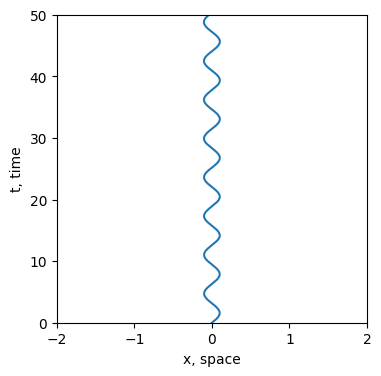

In [92]:
plt.rcParams["figure.figsize"] = (4, 4)
plt.plot(*calc_worldline(0, 0.1))
plt.xlim([-2, 2])
plt.ylim([0, 50])
plt.xlabel('x, space')
plt.ylabel('t, time')

Since we're using a slower maximum speed here, the $(1 - \dot{x}^2)^{3/2}$ factor in the Euler-Lagrange equation becomes less important, so the path of motion looks more like a sine wave than the higher velocity example.